# COMM 365 Assignment 4
The code used in this notebook was built using methods developed in the example notebooks provided in COMM 365 as a template.

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [18]:
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

In [3]:
eps = [0.57, 0.65, 0.6, 0.73, 0.56, 0.66, 0.59, 0.71, 0.63, 0.39, 0.71, 0.87, 0.71,
       0.91, 0.85, 0.99, 0.81, 4.02, 0.96]
eps = pd.DataFrame(data=eps)


rev2 = [947, 734, 867, 1098, 876, 972, 983.3, 1108, 805.8, 871.8, 1004, 1170, 1054, 1125,
        1412, 1615]
rev2 = pd.DataFrame(data=rev2)

rev3 = [262, 323, 523, 514, 326, 404, 606, 511, 477.2, 576.6, 896.7, 753.9, 487.3, 650.3, 
        1037, 1030, 543.6, 763.5]
rev3 = pd.DataFrame(data =rev3)

## ARIMA Model

In [4]:
def arima_model(data):
    return ARIMA(data, order=(2, 0, 0)).fit()

In [5]:
eps_arima = arima_model(eps)
rev2_arima = arima_model(rev2)
rev3_arima = arima_model(rev3)

arima_models = [[eps_arima, 'ARIMA - EPS'], [rev2_arima, 'ARIMA - Revenue 2'], [rev3_arima, 'ARIMA - Revenue 3']]

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [6]:
for i in range(len(arima_models)):
    print(arima_models[i][0].summary())

                               SARIMAX Results                                
Dep. Variable:                      0   No. Observations:                   19
Model:                 ARIMA(2, 0, 0)   Log Likelihood                 -21.038
Date:                Sun, 04 Apr 2021   AIC                             50.076
Time:                        22:34:27   BIC                             53.854
Sample:                             0   HQIC                            50.715
                                 - 19                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0094      1.534      0.658      0.511      -1.998       4.017
ar.L1          0.0353      1.725      0.020      0.984      -3.346       3.417
ar.L2          0.4968      1.286      0.386      0.6

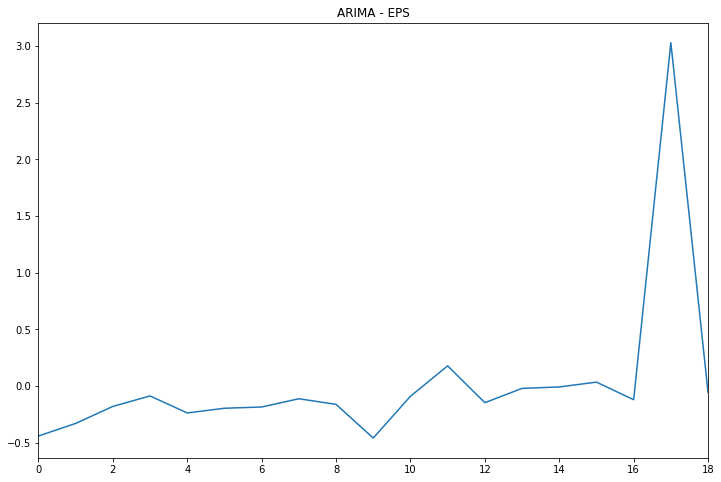

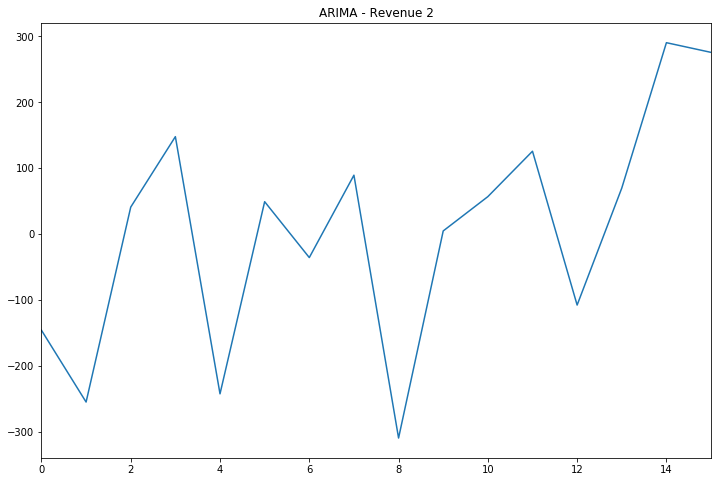

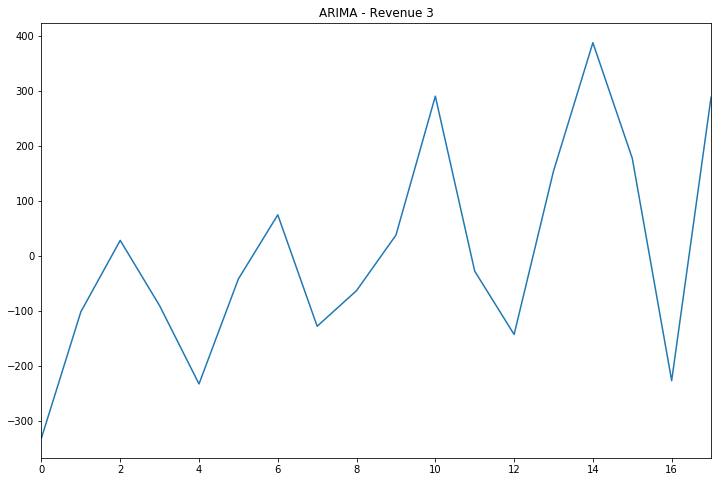

In [7]:
for i in range(len(arima_models)):
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111)
    ax = arima_models[i][0].resid.plot(ax=ax);
    plt.title(arima_models[i][1])

In [8]:
eps_predict = eps_arima.predict()
rev2_predict = rev2_arima.predict()
rev3_predict = rev3_arima.predict()

In [9]:
eps_predict

0     1.009425
1     0.978595
2     0.778426
3     0.816406
4     0.796155
5     0.854738
6     0.773811
7     0.821021
8     0.790480
9     0.847273
10    0.799056
11    0.691119
12    0.855746
13    0.929587
14    0.857158
15    0.954402
16    0.929536
17    0.992734
18    1.016633
Name: predicted_mean, dtype: float64

In [10]:
rev2_predict

0     1092.710315
1      988.612200
2      825.992946
3      950.119198
4     1118.176817
5      922.757470
6     1018.802727
7     1018.566274
8     1115.005438
9      866.920740
10     947.087155
11    1044.221497
12    1161.529072
13    1055.137327
14    1121.616931
15    1339.321991
Name: predicted_mean, dtype: float64

In [11]:
rev3_predict

0     593.591873
1     425.083222
2     495.101982
3     604.907956
4     559.205338
5     446.269094
6     531.673245
7     639.282112
8     540.687359
9     539.157052
10    606.621175
11    782.009882
12    630.496738
13    496.487175
14    649.573341
15    852.824700
16    770.807238
17    475.340663
Name: predicted_mean, dtype: float64

In [12]:
def rmse(actual, pred):
    temp = pred - actual
    temp = temp[0]
    s = 0
    count = 0
    for i in range(len(temp)):
        temp[i] = temp[i] ** 2
        count += 1
        s += temp[i]
        
    return s / count

In [13]:
print("RMSE of EPS using ARIMA: " + str(rmse(eps, eps_predict)))
print("RMSE of Revenue 2 using ARIMA: " + str(rmse(rev2, rev2_predict)))
print("RMSE of Revenue 3 using ARIMA: " + str(rmse(rev3, rev3_predict)))

RMSE of EPS using ARIMA: 0.5802892557920131
RMSE of Revenue 2 using ARIMA: 49803.25546576516
RMSE of Revenue 3 using ARIMA: 48520.592003592705


## Exponential Smoothing

In [22]:
# EPS ExpSmoothing Calculations
fit1 = SimpleExpSmoothing(eps, initialization_method="estimated").fit()
fit2 = Holt(eps, initialization_method="estimated").fit()
fit3 = Holt(eps,exponential=True, initialization_method="estimated").fit()
fit4 = Holt(eps,damped_trend=True, initialization_method="estimated").fit(damping_trend=0.98)
fit5 = Holt(eps,exponential=True, damped_trend=True, initialization_method="estimated").fit()
params = ['smoothing_level', 'smoothing_trend', 'damping_trend', 'initial_level', 'initial_trend']
results=pd.DataFrame(index=[r"$\alpha$",r"$\beta$",r"$\phi$",r"$l_0$","$b_0$","SSE"] ,columns=['SES', "Holt's","Exponential", "Additive", "Multiplicative"])
results["SES"] =            [fit1.params[p] for p in params] + [fit1.sse]
results["Holt's"] =         [fit2.params[p] for p in params] + [fit2.sse]
results["Exponential"] =    [fit3.params[p] for p in params] + [fit3.sse]
results["Additive"] =       [fit4.params[p] for p in params] + [fit4.sse]
results["Multiplicative"] = [fit5.params[p] for p in params] + [fit5.sse]
print("EPS - Exponential Smoothing Results")
results

EPS - Exponential Smoothing Results


,SES,Holt's,Exponential,Additive,Multiplicative
$\alpha$,0.198671,1.490178e-08,1.490116e-08,1.490130e-08,1.490116e-08
$\beta$,NaN,0.000000e+00,1.490116e-08,4.121096e-09,2.152726e-09
$\phi$,NaN,NaN,NaN,9.800000e-01,9.950000e-01
$l_0$,0.661821,2.465212e-01,2.952450e-01,2.241855e-01,2.872304e-01
$b_0$,NaN,6.439943e-02,1.099600e+00,7.643390e-02,1.111176e+00
SSE,10.920510,8.392642e+00,7.734599e+00,8.556962e+00,7.767434e+00


In [19]:
# Revenue 2 ExpSmoothing Calculations
fit1 = SimpleExpSmoothing(rev2, initialization_method="estimated").fit()
fit2 = Holt(rev2, initialization_method="estimated").fit()
fit3 = Holt(rev2,exponential=True, initialization_method="estimated").fit()
fit4 = Holt(rev2,damped_trend=True, initialization_method="estimated").fit(damping_trend=0.98)
fit5 = Holt(rev2,exponential=True, damped_trend=True, initialization_method="estimated").fit()
params = ['smoothing_level', 'smoothing_trend', 'damping_trend', 'initial_level', 'initial_trend']
results=pd.DataFrame(index=[r"$\alpha$",r"$\beta$",r"$\phi$",r"$l_0$","$b_0$","SSE"] ,columns=['SES', "Holt's","Exponential", "Additive", "Multiplicative"])
results["SES"] =            [fit1.params[p] for p in params] + [fit1.sse]
results["Holt's"] =         [fit2.params[p] for p in params] + [fit2.sse]
results["Exponential"] =    [fit3.params[p] for p in params] + [fit3.sse]
results["Additive"] =       [fit4.params[p] for p in params] + [fit4.sse]
results["Multiplicative"] = [fit5.params[p] for p in params] + [fit5.sse]
print("Revenue 2 - Exponential Smoothing Results")
results

Revenue 2 - Exponential Smoothing Results


,SES,Holt's,Exponential,Additive,Multiplicative
$\alpha$,0.782212,0.001441,0.457357,0.459040,0.457741
$\beta$,NaN,0.001396,0.457357,0.459040,0.457484
$\phi$,NaN,NaN,NaN,0.980000,0.982447
$l_0$,908.856983,755.334659,863.861063,846.037545,867.138175
$b_0$,NaN,33.534778,1.021168,22.170585,1.038559
SSE,463544.917929,369081.010449,417295.462819,432690.758596,418608.198612


In [20]:
# Revenue 3 ExpSmoothing Calculations
fit1 = SimpleExpSmoothing(rev3, initialization_method="estimated").fit()
fit2 = Holt(rev3, initialization_method="estimated").fit()
fit3 = Holt(rev3,exponential=True, initialization_method="estimated").fit()
fit4 = Holt(rev3,damped_trend=True, initialization_method="estimated").fit(damping_trend=0.98)
fit5 = Holt(rev3,exponential=True, damped_trend=True, initialization_method="estimated").fit()
params = ['smoothing_level', 'smoothing_trend', 'damping_trend', 'initial_level', 'initial_trend']
results=pd.DataFrame(index=[r"$\alpha$",r"$\beta$",r"$\phi$",r"$l_0$","$b_0$","SSE"] ,columns=['SES', "Holt's","Exponential", "Additive", "Multiplicative"])
results["SES"] =            [fit1.params[p] for p in params] + [fit1.sse]
results["Holt's"] =         [fit2.params[p] for p in params] + [fit2.sse]
results["Exponential"] =    [fit3.params[p] for p in params] + [fit3.sse]
results["Additive"] =       [fit4.params[p] for p in params] + [fit4.sse]
results["Multiplicative"] = [fit5.params[p] for p in params] + [fit5.sse]
print("Revenue 3 - Exponential Smoothing Results")
results

Revenue 3 - Exponential Smoothing Results


,SES,Holt's,Exponential,Additive,Multiplicative
$\alpha$,0.355104,0.005256,0.185540,0.099172,0.122857
$\beta$,NaN,0.005256,0.183684,0.099162,0.122857
$\phi$,NaN,NaN,NaN,0.980000,0.990000
$l_0$,371.828288,312.455214,367.541138,312.286598,312.120000
$b_0$,NaN,29.958240,1.065653,36.352480,1.091715
SSE,660342.246305,421576.330399,573083.709690,466059.139966,569360.892864


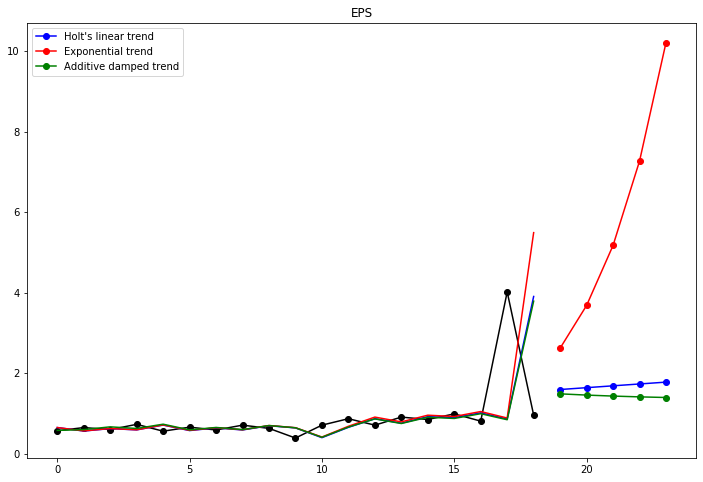

In [31]:
fit1 = Holt(eps, initialization_method="estimated").fit(smoothing_level=0.8, smoothing_trend=0.2, optimized=False)
fcast1 = fit1.forecast(5).rename("Holt's linear trend")
fit2 = Holt(eps, exponential=True, initialization_method="estimated").fit(smoothing_level=0.8, smoothing_trend=0.2, optimized=False)
fcast2 = fit2.forecast(5).rename("Exponential trend")
fit3 = Holt(eps, damped_trend=True, initialization_method="estimated").fit(smoothing_level=0.8, smoothing_trend=0.2)
fcast3 = fit3.forecast(5).rename("Additive damped trend")

plt.figure(figsize=(12, 8))
plt.plot(eps, marker='o', color='black')
plt.plot(fit1.fittedvalues, color='blue')
line1, = plt.plot(fcast1, marker='o', color='blue')
plt.plot(fit2.fittedvalues, color='red')
line2, = plt.plot(fcast2, marker='o', color='red')
plt.plot(fit3.fittedvalues, color='green')
line3, = plt.plot(fcast3, marker='o', color='green')
plt.legend([line1, line2, line3], [fcast1.name, fcast2.name, fcast3.name])
plt.title("EPS")
plt.show()

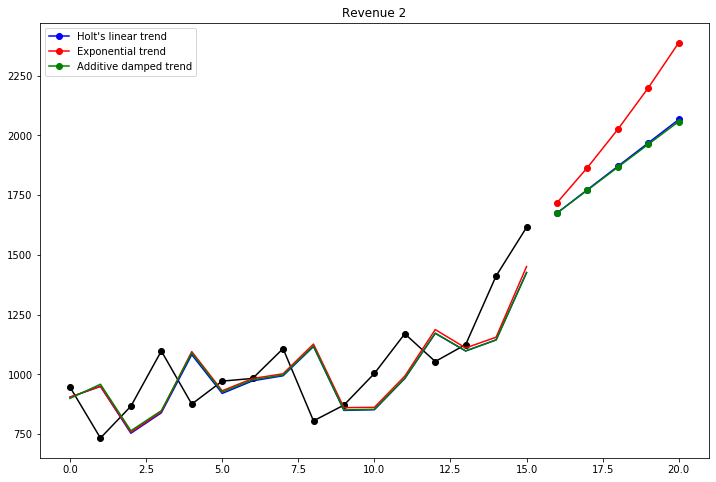

In [28]:
fit1 = Holt(rev2, initialization_method="estimated").fit(smoothing_level=0.8, smoothing_trend=0.2, optimized=False)
fcast1 = fit1.forecast(5).rename("Holt's linear trend")
fit2 = Holt(rev2, exponential=True, initialization_method="estimated").fit(smoothing_level=0.8, smoothing_trend=0.2, optimized=False)
fcast2 = fit2.forecast(5).rename("Exponential trend")
fit3 = Holt(rev2, damped_trend=True, initialization_method="estimated").fit(smoothing_level=0.8, smoothing_trend=0.2)
fcast3 = fit3.forecast(5).rename("Additive damped trend")

plt.figure(figsize=(12, 8))
plt.plot(rev2, marker='o', color='black')
plt.plot(fit1.fittedvalues, color='blue')
line1, = plt.plot(fcast1, marker='o', color='blue')
plt.plot(fit2.fittedvalues, color='red')
line2, = plt.plot(fcast2, marker='o', color='red')
plt.plot(fit3.fittedvalues, color='green')
line3, = plt.plot(fcast3, marker='o', color='green')
plt.legend([line1, line2, line3], [fcast1.name, fcast2.name, fcast3.name])
plt.title("Revenue 2")
plt.show()

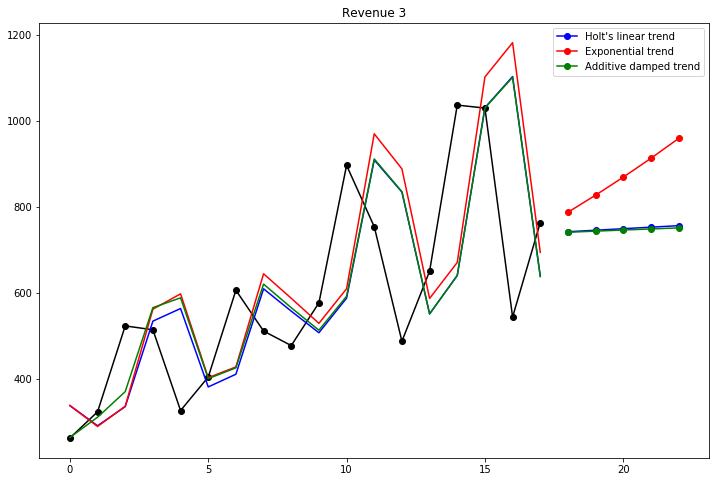

In [30]:
fit1 = Holt(rev3, initialization_method="estimated").fit(smoothing_level=0.8, smoothing_trend=0.2, optimized=False)
fcast1 = fit1.forecast(5).rename("Holt's linear trend")
fit2 = Holt(rev3, exponential=True, initialization_method="estimated").fit(smoothing_level=0.8, smoothing_trend=0.2, optimized=False)
fcast2 = fit2.forecast(5).rename("Exponential trend")
fit3 = Holt(rev3, damped_trend=True, initialization_method="estimated").fit(smoothing_level=0.8, smoothing_trend=0.2)
fcast3 = fit3.forecast(5).rename("Additive damped trend")

plt.figure(figsize=(12, 8))
plt.plot(rev3, marker='o', color='black')
plt.plot(fit1.fittedvalues, color='blue')
line1, = plt.plot(fcast1, marker='o', color='blue')
plt.plot(fit2.fittedvalues, color='red')
line2, = plt.plot(fcast2, marker='o', color='red')
plt.plot(fit3.fittedvalues, color='green')
line3, = plt.plot(fcast3, marker='o', color='green')
plt.legend([line1, line2, line3], [fcast1.name, fcast2.name, fcast3.name])
plt.title("Revenue 3")
plt.show()